# 次元とデータ数と精度の関係性 NEW

## ランダム配置 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy.random import *

In [2]:
a = np.random.randint(-300,300,(10000,))

In [3]:
b = np.random.randint(0,400,(10000,))

In [4]:
a.shape

(10000,)

(array([108., 104., 104.,  89., 117., 113., 100., 112., 102.,  91.,  83.,
        109., 101.,  98., 111., 106., 104.,  96., 102., 107.,  97.,  85.,
         95.,  85., 111.,  89.,  99., 106.,  95., 101., 120., 106., 112.,
        122., 102.,  80., 109., 114., 107.,  83.,  87.,  93., 102.,  84.,
        120., 114., 103., 125.,  82.,  90., 104., 105., 107., 106.,  66.,
         96.,  98., 109., 104.,  91., 106., 119., 106.,  98., 102.,  84.,
         98.,  93., 107.,  98., 101.,  87.,  94.,  96., 113., 111.,  89.,
         77.,  87.,  97., 103., 102.,  97.,  97.,  88.,  86.,  76.,  96.,
        102., 129.,  99.,  83., 104., 107.,  92.,  94., 109.,  96., 104.,
        112.]),
 array([  0.  ,   3.99,   7.98,  11.97,  15.96,  19.95,  23.94,  27.93,
         31.92,  35.91,  39.9 ,  43.89,  47.88,  51.87,  55.86,  59.85,
         63.84,  67.83,  71.82,  75.81,  79.8 ,  83.79,  87.78,  91.77,
         95.76,  99.75, 103.74, 107.73, 111.72, 115.71, 119.7 , 123.69,
        127.68, 131.67, 135.66

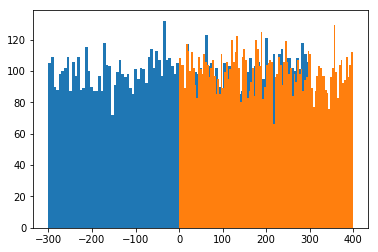

In [5]:
plt.hist(a,bins=100)
plt.hist(b,bins=100)

In [6]:
def calc_squrt(a,b):
    return (a**2+b**2)**(0.5)

In [7]:
r = calc_squrt(a,b)

In [8]:
r.shape

(10000,)

In [9]:
r

array([344.55333404, 132.81566173, 151.42654985, ...,  58.1893461 ,
       337.65811111, 217.26481538])

In [10]:
df = pd.DataFrame({
    "a": a,
    "b": b,
    "r":r
})

In [11]:
df.head()

,a,b,r
0,-219,266,344.553334
1,-126,42,132.815662
2,-149,27,151.426550
3,27,272,273.336789
4,208,368,422.715034


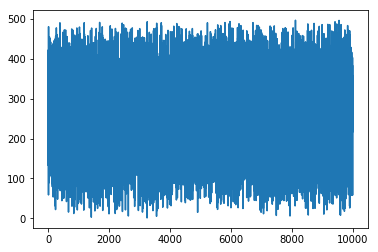

In [12]:
x = np.arange(len(df["r"]))
plt.plot(x,df["r"])

In [13]:
t1= np.where(df["r"] >= 300,0,1)
t2= np.where(df["r"] >= 300,1,0)

In [14]:
df["off"] = t1
df["on"] = t2

In [15]:
df.head()

,a,b,r,off,on
0,-219,266,344.553334,0,1
1,-126,42,132.815662,1,0
2,-149,27,151.426550,1,0
3,27,272,273.336789,1,0
4,208,368,422.715034,0,1


In [16]:
df1 = df[df.on==1]

df2 = df[df.on==0]

In [17]:
df1.shape,df2.shape

((4037, 5), (5963, 5))

In [18]:
t = np.array([t1,t2])

In [19]:
t.T

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [20]:
df.shape

(10000, 5)

In [21]:
t.T[:7000].shape

(7000, 2)

In [22]:
t_train = t.T[:7000]

In [23]:
t_train

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]])

In [24]:
t_test = t.T[7001:,:]
print(t_test)

[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [0 1]
 [1 0]]


In [25]:
t_train.shape,t_test.shape

((7000, 2), (2999, 2))

In [26]:
x = np.array([df["a"],df["b"]]).T

In [27]:
x.shape

(10000, 2)

In [28]:
(x_train, x_test) = (x[:7000],x[7001:])

In [29]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 10
train_size = x_train.shape[0]
batch_size = 1000
learning_rate = 0.1
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100, 100, 100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100, 100, 100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    bn_test_acc_list =[]
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            bn_test_acc = bn_network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            bn_test_acc_list.append(bn_test_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(bn_train_acc) + " - " + str(bn_test_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return bn_train_acc_list, bn_test_acc_list

In [30]:
train_acc_list3, bn_train_acc_list3 = __train('He')

epoch:0 | 0.4167142857142857 - 0.42714238079359784


../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
../common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/Kohei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:1 | 0.556 - 0.5735245081693898
epoch:2 | 0.7348571428571429 - 0.7519173057685895
epoch:3 | 0.8668571428571429 - 0.8712904301433811
epoch:4 | 0.9188571428571428 - 0.9263087695898633
epoch:5 | 0.9494285714285714 - 0.9483161053684561
epoch:6 | 0.9587142857142857 - 0.9596532177392464
epoch:7 | 0.9724285714285714 - 0.9689896632210737
epoch:8 | 0.98 - 0.9786595531843948
epoch:9 | 0.9825714285714285 - 0.9776592197399133


In [31]:
t.T[:700].shape

(700, 2)

In [32]:
t_train = t.T[:700]

In [33]:
t_train

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]])

In [34]:
t_test = t.T[701:1000,:]
print(t_test)

[[0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]

In [35]:
t_train.shape,t_test.shape

((700, 2), (299, 2))

In [36]:
x = np.array([df["a"],df["b"]]).T

In [37]:
x.shape

(10000, 2)

In [38]:
(x_train, x_test) = (x[:700],x[701:1000])

In [39]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100, 100, 100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100, 100, 100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    bn_test_acc_list =[]
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            bn_test_acc = bn_network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            bn_test_acc_list.append(bn_test_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(bn_train_acc) + " - " + str(bn_test_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return bn_train_acc_list, bn_test_acc_list

In [40]:
train_acc_list4, bn_train_acc_list4 = __train('He')

epoch:0 | 0.47285714285714286 - 0.5083612040133779
epoch:1 | 0.5414285714285715 - 0.6187290969899666
epoch:2 | 0.7414285714285714 - 0.782608695652174
epoch:3 | 0.8457142857142858 - 0.8561872909698997
epoch:4 | 0.92 - 0.9264214046822743


../common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
/Users/Kohei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


epoch:5 | 0.9514285714285714 - 0.979933110367893
epoch:6 | 0.9514285714285714 - 0.9765886287625418
epoch:7 | 0.9485714285714286 - 0.9565217391304348
epoch:8 | 0.9714285714285714 - 0.979933110367893
epoch:9 | 0.97 - 0.979933110367893


## 四次元 

In [41]:
a = np.random.randint(-300,300,(10000,))

In [42]:
b = np.random.randint(0,400,(10000,))

In [43]:
c = np.random.randint(600,900,(10000,))

In [44]:
d = np.random.randint(-500,200,(10000,))

In [45]:
a.shape

(10000,)

(array([ 94.,  94., 111., 103., 102.,  98., 104., 102.,  97.,  83., 104.,
         98.,  95., 107.,  95.,  93.,  89.,  97.,  89.,  88., 109., 111.,
        114.,  94.,  92.,  97., 106.,  94.,  88., 109.,  85., 103.,  95.,
        105., 108.,  92., 113.,  97., 102., 103., 106.,  89.,  86.,  83.,
        109.,  85., 101., 101.,  92., 104., 116.,  93.,  87., 111.,  92.,
         93., 105.,  98., 114., 105.,  95.,  77.,  98., 100., 108., 103.,
         96.,  91., 123., 108.,  93., 110., 106., 107., 101., 109., 106.,
        104.,  96., 101., 100., 110.,  95., 134.,  97., 117.,  91.,  92.,
        111., 107., 124., 102.,  99.,  96.,  93.,  74., 108.,  99.,  91.,
         98.]),
 array([-500.  , -493.01, -486.02, -479.03, -472.04, -465.05, -458.06,
        -451.07, -444.08, -437.09, -430.1 , -423.11, -416.12, -409.13,
        -402.14, -395.15, -388.16, -381.17, -374.18, -367.19, -360.2 ,
        -353.21, -346.22, -339.23, -332.24, -325.25, -318.26, -311.27,
        -304.28, -297.29, -290.3 ,

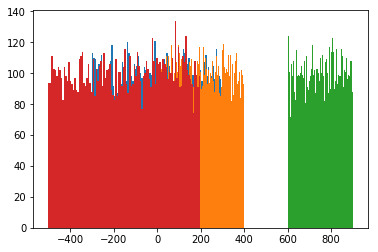

In [46]:
plt.hist(a,bins=100)
plt.hist(b,bins=100)
plt.hist(c,bins=100)
plt.hist(d,bins=100)

In [47]:
def calc_squrt(a,b):
    return (a**2+b**2+c**2+d**2)**(0.5)

In [48]:
r = calc_squrt(a,b)

In [49]:
r.shape

(10000,)

In [50]:
r

array([748.1189745 , 847.66089918, 971.1822692 , ..., 747.10507962,
       762.10038709, 682.70564667])

In [51]:
df = pd.DataFrame({
    "a": a,
    "b": b,
    "c": c,
    "d": d,
    "r":r
})

In [52]:
df.head()

,a,b,c,d,r
0,-183,189,694,-94,748.118974
1,-294,310,717,148,847.660899
2,164,337,881,-163,971.182269
3,-62,103,818,-419,926.896974
4,283,184,874,-231,964.977720


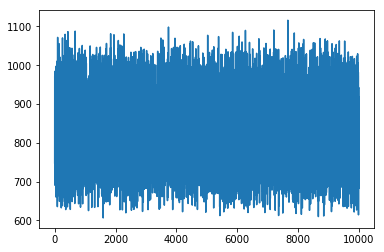

In [53]:
x = np.arange(len(df["r"]))
plt.plot(x,df["r"])

In [54]:
t1= np.where(df["r"] >= 900,0,1)
t2= np.where(df["r"] >= 900,1,0)

In [55]:
df["off"] = t1
df["on"] = t2

In [56]:
df.head()

,a,b,c,d,r,off,on
0,-183,189,694,-94,748.118974,1,0
1,-294,310,717,148,847.660899,1,0
2,164,337,881,-163,971.182269,0,1
3,-62,103,818,-419,926.896974,0,1
4,283,184,874,-231,964.977720,0,1


In [57]:
df1 = df[df.on==1]

df2 = df[df.on==0]

In [58]:
df1.shape,df2.shape

((2893, 7), (7107, 7))

In [59]:
t = np.array([t1,t2])

In [60]:
t.T

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [61]:
df.shape

(10000, 7)

In [62]:
t.T[:7000].shape

(7000, 2)

In [63]:
t_train = t.T[:7000]

In [64]:
t_train

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]])

In [65]:
t_test = t.T[7001:,:]
print(t_test)

[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [66]:
t_train.shape,t_test.shape

((7000, 2), (2999, 2))

In [67]:
x = np.array([df["a"],df["b"],df["c"],df["d"]]).T

In [68]:
x.shape

(10000, 4)

In [69]:
(x_train, x_test) = (x[:7000],x[7001:])

In [70]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 10
train_size = x_train.shape[0]
batch_size = 1000
learning_rate = 0.1
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=4, hidden_size_list=[100, 100, 100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=4, hidden_size_list=[100, 100, 100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    bn_test_acc_list =[]
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            bn_test_acc = bn_network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            bn_test_acc_list.append(bn_test_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(bn_train_acc) + " - " + str(bn_test_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return bn_train_acc_list, bn_test_acc_list

In [71]:
train_acc_list41, bn_train_acc_list41 = __train('He')

epoch:0 | 0.29185714285714287 - 0.2830943647882628
epoch:1 | 0.29185714285714287 - 0.2830943647882628
epoch:2 | 0.3607142857142857 - 0.3451150383461154
epoch:3 | 0.6187142857142857 - 0.6082027342447482
epoch:4 | 0.7968571428571428 - 0.7832610870290097
epoch:5 | 0.874 - 0.8652884294764922
epoch:6 | 0.9181428571428571 - 0.9136378792930977
epoch:7 | 0.9455714285714286 - 0.9379793264421474
epoch:8 | 0.9652857142857143 - 0.9583194398132711
epoch:9 | 0.9684285714285714 - 0.9639879959986662


In [72]:
t.T[:700].shape

(700, 2)

In [73]:
t_train = t.T[:700]

In [74]:
t_train

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]])

In [75]:
t_test = t.T[701:1000,:]
print(t_test)

[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]

In [76]:
t_train.shape,t_test.shape

((700, 2), (299, 2))

In [77]:
x = np.array([df["a"],df["b"],df["c"],df["d"]]).T

In [78]:
x.shape

(10000, 4)

In [79]:
(x_train, x_test) = (x[:700],x[701:1000])

In [80]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=4, hidden_size_list=[100, 100, 100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=4, hidden_size_list=[100, 100, 100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    bn_test_acc_list =[]
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            bn_test_acc = bn_network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            bn_test_acc_list.append(bn_test_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(bn_train_acc) + " - " + str(bn_test_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return bn_train_acc_list, bn_test_acc_list

In [81]:
train_acc_list42, bn_train_acc_list42 = __train('He')

epoch:0 | 0.2857142857142857 - 0.26755852842809363
epoch:1 | 0.28285714285714286 - 0.26755852842809363
epoch:2 | 0.39571428571428574 - 0.3879598662207358
epoch:3 | 0.6457142857142857 - 0.6488294314381271
epoch:4 | 0.7985714285714286 - 0.7759197324414716
epoch:5 | 0.9 - 0.882943143812709
epoch:6 | 0.9457142857142857 - 0.9264214046822743
epoch:7 | 0.9414285714285714 - 0.9364548494983278
epoch:8 | 0.9671428571428572 - 0.9498327759197325
epoch:9 | 0.9728571428571429 - 0.9665551839464883


### ６次元 

In [82]:
a = np.random.randint(-300,300,(10000,))

In [83]:
b = np.random.randint(0,400,(10000,))

In [84]:
c = np.random.randint(600,900,(10000,))

In [85]:
d = np.random.randint(-500,200,(10000,))

In [86]:
e = np.random.randint(10,50,(10000,))

In [87]:
f = np.random.randint(1500,1700,(10000,))

In [88]:
a.shape

(10000,)

(array([104., 111.,  96., 104.,  88.,  77.,  93.,  97.,  88., 107., 106.,
         94., 115., 119., 118.,  83., 102., 109., 102., 128., 111., 104.,
         81., 108.,  90.,  96., 109.,  97., 106.,  93., 103., 101., 106.,
        108., 104., 112., 118.,  92., 102., 112.,  91., 105.,  95., 111.,
         88., 101.,  98., 105.,  81., 113., 101.,  89.,  89., 107.,  96.,
        115.,  87., 119.,  85.,  90.,  76.,  83.,  96.,  99.,  98., 107.,
         95.,  98.,  99.,  94., 106., 115.,  92.,  97., 114.,  97.,  86.,
         96., 100., 102.,  92., 101., 105.,  99., 105., 109., 105.,  88.,
        103., 104., 108.,  89.,  79., 115., 108., 100.,  78., 106., 102.,
         94.]),
 array([1500.  , 1501.99, 1503.98, 1505.97, 1507.96, 1509.95, 1511.94,
        1513.93, 1515.92, 1517.91, 1519.9 , 1521.89, 1523.88, 1525.87,
        1527.86, 1529.85, 1531.84, 1533.83, 1535.82, 1537.81, 1539.8 ,
        1541.79, 1543.78, 1545.77, 1547.76, 1549.75, 1551.74, 1553.73,
        1555.72, 1557.71, 1559.7 ,

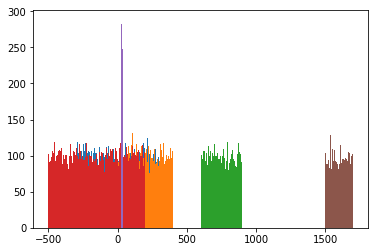

In [89]:
plt.hist(a,bins=100)
plt.hist(b,bins=100)
plt.hist(c,bins=100)
plt.hist(d,bins=100)
plt.hist(e,bins=100)
plt.hist(f,bins=100)

In [90]:
def calc_squrt(a,b):
    return (a**2+b**2+c**2+d**2+e**2+f**2)**(0.5)

In [91]:
r = calc_squrt(a,b)

In [92]:
r.shape

(10000,)

In [93]:
r

array([1754.26280813, 1881.87645716, 1713.18154321, ..., 1780.27245106,
       1815.6045825 , 1881.38512804])

In [94]:
df = pd.DataFrame({
    "a": a,
    "b": b,
    "c": c,
    "d": d,
    "e": e,
    "f": f,
    "r":r
})

In [95]:
df.head()

,a,b,c,d,e,f,r
0,-126,165,746,-330,20,1539,1754.262808
1,-271,230,897,-106,27,1612,1881.876457
2,-153,22,807,-38,49,1502,1713.181543
3,-206,335,818,-262,11,1583,1843.485557
4,-218,322,812,-490,40,1588,1890.501521


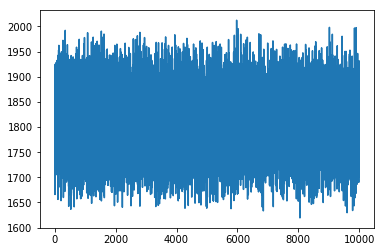

In [96]:
x = np.arange(len(df["r"]))
plt.plot(x,df["r"])

In [97]:
t1= np.where(df["r"] >= 1850,0,1)
t2= np.where(df["r"] >= 1850,1,0)

In [98]:
df["off"] = t1
df["on"] = t2

In [99]:
df.head()

,a,b,c,d,e,f,r,off,on
0,-126,165,746,-330,20,1539,1754.262808,1,0
1,-271,230,897,-106,27,1612,1881.876457,0,1
2,-153,22,807,-38,49,1502,1713.181543,1,0
3,-206,335,818,-262,11,1583,1843.485557,1,0
4,-218,322,812,-490,40,1588,1890.501521,0,1


In [100]:
df1 = df[df.on==1]

df2 = df[df.on==0]

In [101]:
df1.shape,df2.shape

((2833, 9), (7167, 9))

In [102]:
t = np.array([t1,t2])

In [103]:
t.T

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]])

In [104]:
df.shape

(10000, 9)

In [105]:
t.T[:7000].shape

(7000, 2)

In [106]:
t_train = t.T[:7000]

In [107]:
t_train

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [108]:
t_test = t.T[7001:,:]
print(t_test)

[[0 1]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]


In [109]:
t_train.shape,t_test.shape

((7000, 2), (2999, 2))

In [110]:
x = np.array([df["a"],df["b"],df["c"],df["d"],df["e"],df["f"]]).T

In [111]:
x.shape

(10000, 6)

In [112]:
(x_train, x_test) = (x[:7000],x[7001:])

In [113]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 10
train_size = x_train.shape[0]
batch_size = 1000
learning_rate = 0.1
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=6, hidden_size_list=[100, 100, 100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=6, hidden_size_list=[100, 100, 100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    bn_test_acc_list =[]
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            bn_test_acc = bn_network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            bn_test_acc_list.append(bn_test_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(bn_train_acc) + " - " + str(bn_test_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return bn_train_acc_list, bn_test_acc_list

In [114]:
train_acc_list61, bn_train_acc_list61 = __train('He')

epoch:0 | 0.2855714285714286 - 0.2780926975658553
epoch:1 | 0.2855714285714286 - 0.2780926975658553
epoch:2 | 0.2855714285714286 - 0.2780926975658553
epoch:3 | 0.29185714285714287 - 0.2847615871957319
epoch:4 | 0.4684285714285714 - 0.44581527175725244
epoch:5 | 0.6921428571428572 - 0.6822274091363788
epoch:6 | 0.8228571428571428 - 0.8252750916972325
epoch:7 | 0.8958571428571429 - 0.8939646548849617
epoch:8 | 0.9178571428571428 - 0.9166388796265422
epoch:9 | 0.937 - 0.9376458819606536


In [115]:
t.T[:700].shape

(700, 2)

In [116]:
t_train = t.T[:700]

In [117]:
t_train

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [118]:
t_test = t.T[701:1000,:]
print(t_test)

[[0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]

In [119]:
t_train.shape,t_test.shape

((700, 2), (299, 2))

In [120]:
x = np.array([df["a"],df["b"],df["c"],df["d"],df["e"],df["f"]]).T

In [121]:
x.shape

(10000, 6)

In [122]:
(x_train, x_test) = (x[:700],x[701:1000])

In [123]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=6, hidden_size_list=[100, 100, 100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=6, hidden_size_list=[100, 100, 100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    bn_test_acc_list =[]
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            bn_test_acc = bn_network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            bn_test_acc_list.append(bn_test_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(bn_train_acc) + " - " + str(bn_test_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return bn_train_acc_list, bn_test_acc_list

In [124]:
train_acc_list62, bn_train_acc_list62 = __train('He')

epoch:0 | 0.2714285714285714 - 0.27759197324414714
epoch:1 | 0.2714285714285714 - 0.27759197324414714
epoch:2 | 0.2714285714285714 - 0.27759197324414714
epoch:3 | 0.2785714285714286 - 0.28762541806020064
epoch:4 | 0.4542857142857143 - 0.4816053511705686
epoch:5 | 0.7142857142857143 - 0.7190635451505016
epoch:6 | 0.8728571428571429 - 0.8762541806020067
epoch:7 | 0.8814285714285715 - 0.8929765886287625
epoch:8 | 0.9285714285714286 - 0.9130434782608695
epoch:9 | 0.9714285714285714 - 0.9632107023411371


Text(0.5,1,'Relationship between Dimension, Data number and accuracy')

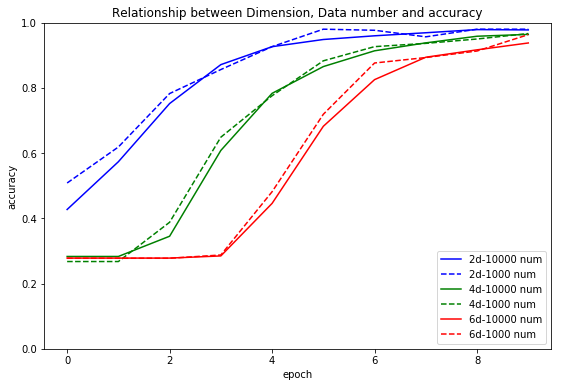

In [125]:
# グラフの描画
plt.figure(figsize=(20,6)) # figureの縦横の大きさ
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(bn_train_acc_list3))
plt.subplot(1,2,1)
plt.plot(x, bn_train_acc_list3, label='2d-10000 num', markevery=2, color = "blue")
plt.plot(x, bn_train_acc_list4, label='2d-1000 num', markevery=2, color = "blue",linestyle = "dashed")
plt.plot(x, bn_train_acc_list41, label='4d-10000 num', markevery=2, color = "green")
plt.plot(x, bn_train_acc_list42, label='4d-1000 num', markevery=2, color = "green",linestyle = "dashed")
plt.plot(x, bn_train_acc_list61, label='6d-10000 num', markevery=2, color = "red")
plt.plot(x, bn_train_acc_list62, label='6d-1000 num', markevery=2, color = "red",linestyle = "dashed")

plt.xlabel('epoch')
plt.xlabel('epoch')
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.title('Relationship between Dimension, Data number and accuracy')

### 考察
* データ数が多いと次元数を増やしても精度に影響しない
* データ数が少ないと次元を大きくするほうが精度が落ちている